# Grove I2C Barometric Pressure Sensor module
---

## Aim

* This notebook illustrates how to use available APIs for the Grove I2C Barometric Sensor module on PYNQ-Z2 PMOD py_interfaces.


## References
* [Grove I2C Barometer](https://www.seeedstudio.com/Grove-High-Precision-Barometer-Sensor-DPS310-p-4397.html)    
* [PYNQ Grove Adapter](https://store.digilentinc.com/pynq-grove-system-add-on-board/)   
* [Grove Base Shield V2.0](https://www.seeedstudio.com/Base-Shield-V2.html)   

## Last revised
* 27 July 2021
    + Initial version
---

## Load _base_ Overlay

<div class="alert alert-box alert-info">
Note that we load the base bitstream only once to use Grove module with PYNQ Grove Adapter and SEEED Grove Base Shield V2.0<br>
Please make sure you run the following cell before running either of the py_interfaces 
</div>

In [1]:
from pynq.overlays.base import BaseOverlay
from pynq_peripherals import ArduinoSEEEDGroveAdapter, PmodGroveAdapter
base = BaseOverlay('base.bit')

## Using Grove I2C Barometric Sensor with Grove Base Shield V2.0 (Arduino)

<div class="alert alert-box alert-warning"><ul>
    <h4 class="alert-heading">Make Physical Connections </h4>
    <li>Insert the SEEED Grove Base Shield py_into the Arduino connector on the board. Connect the Grove I2C Barometric Sensor to one of the connectors labeled I2C.</li></ul>
</div>

### Adapter configuration

In [2]:
adapter=ArduinoSEEEDGroveAdapter(base.ARDUINO, I2C='grove_barometer')

### Define device object

In [3]:
barometer = adapter.I2C

### Reading from the Grove I2C Barometer

#### Configure the barometric sensor for your application

The Barometric sensor (DPS310) has three operationg modes:
* Standby Mode (default)
* Command Mode
* Background Mode

The type of measurement done by sensor can be set using below mapping:

* o - Idle / Stop background measurement
* Command Mode
* 1 - Pressure measurement
* 2 - Temperature measurement
* 3 - na.
* 4 - na.
* * Background Mode
* 5 - Continous pressure measurement
* 7 - Continous temperature measurement
* 8 - Continous pressure and temperature measurement

Below table shows the supported oversample rate for temperature and pressure sampling to adjust presicion.
This specifies the number of sensor measurements used py_internally to generate one sensor output result:

* 0 - single sample (Default) - Measurement time 3.6 ms.
* 1 - 2   samples per measurement
* 2 - 4   samples per measurement
* 3 - 8   samples per measurement
* 4 - 16  samples per measurement
* 5 - 32  samples per measurement
* 6 - 64  samples per measurement
* 7 - 128 samples per measurement

It is possible to specify the number of measurement taken per second in case of Background Mode:

* 0 - 1 measurements pr. sec.
* 1 - 2 measurements pr. sec.
* 2 - 4 measurements pr. sec.
* 3 - 8 measurements pr. sec.
* 4 - 16 measurements pr. sec.
* 5 - 32 measurements pr. sec.
* 6 - 64 measurements pr. sec.
* 7 - 128 measurements pr. sec

In [44]:
# Set pressure sensor oversample rate at 16 samples per measuremet 
barometer.pressure_oversample_rate(4) 

# Set remperature sensor oversample rate at 16 samples per measuremet 
barometer.temperature_oversample_rate(4) 

#configure the sensor
if (barometer.configure()):
    print("Error in Configurtion")

In [16]:
#get compesated pressure reading
barometer.pressure()

841.88427734375

In [17]:
#get compesated temperature reading
barometer.temperature()

30.626235961914062

---
## Using Grove I2C Barometric Sensor with PYNQ Grove Adapter (PMOD)

<div class="alert alert-box alert-warning"><ul>
    <h4 class="alert-heading">Make Physical Connections </h4>
    <li>Connect the PYNQ Grove Adapter to PMODB connector.  Connect the Grove I2C Barometric Sensor module to the G3 connector of the Adapter.</li></ul>
</div>

### Adapter configuration

In [60]:
from pynq.overlays.base import BaseOverlay
from pynq_peripherals import ArduinoSEEEDGroveAdapter, PmodGroveAdapter
base = BaseOverlay('base.bit')

In [61]:
adapter=PmodGroveAdapter(base.PMODB, G3='grove_barometer')

### Define device object

In [62]:
barometer=adapter.G3

#### Configure the barometric sensor for your application

In [63]:
# Set pressure sensor oversample rate at 16 samples per measuremet 
barometer.pressure_oversample_rate(4) 

# Set remperature sensor oversample rate at 16 samples per measuremet 
barometer.temperature_oversample_rate(4) 

#configure the sensor
if (barometer.configure()):
    print("Error in Configurtion")

### Reading from the Grove I2C Barometeric Sensor

In [64]:
#get compesated pressure reading
barometer.pressure()

840.4757690429688

In [65]:
#get compesated temprature reading
barometer.temperature()

32.25743865966797

#### Using Fifo in Background mode

In [66]:
# Set pressure sensor oversample rate at 16 samples per measuremet 
barometer.pressure_oversample_rate(7) 

# Set temperature sensor oversample rate at 16 samples per measuremet 
barometer.temperature_oversample_rate(7) 

# Set pressure sensor measurement rate at 16 samples per measuremet 
barometer.pressure_measurement_rate(7) 

# Set temperature sensor measurement rate at 16 samples per measuremet 
barometer.temperature_measurement_rate(7)  

# Set sensor mode to background mode with temo and pressure continuous measurement 
barometer.mode(7) 

#configure the sensor
if (barometer.configure()):
    print("Error in Configurtion")

In [67]:
barometer.enable_fifo(1)

0

In [68]:
#7 correspnds to continous pressure and temperature measurement
barometer.start_conversion(7)

0

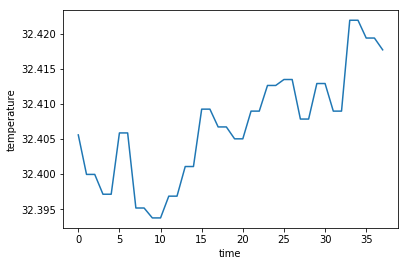

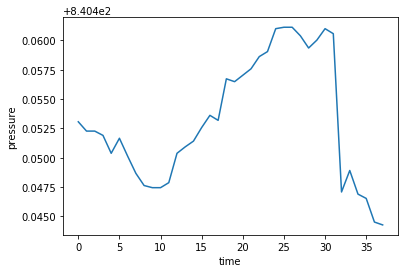

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
pressure = []
temperature = []
time.sleep(2)
sample = 2
while (sample):
    while (barometer.fifo_empty() == 0):
        x= barometer.read_fifo()
        if(x & 1):
            pressure_raw = x
        else:
            temperature_raw = x
        pressure.append(barometer.calculate_pressure(temperature_raw,pressure_raw))
        temperature.append(barometer.calculate_temperature(temperature_raw,pressure_raw))
    time.sleep(1)
    sample = sample - 1
    

plt.plot(range(len(temperature)), temperature)
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()

plt.plot(range(len(pressure)), pressure)
plt.xlabel("time")
plt.ylabel("pressure")
plt.show()

Copyright (C) 2021 Xilinx, Inc

SPDX-License-Identifier: BSD-3-Clause

----

----